<a href="https://colab.research.google.com/github/sky16k/MDS/blob/main/MDS07_HW_%D0%A9%D0%B5%D0%B4%D1%80%D0%B8%D0%BD%D0%BE%D0%B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание "Продвинутая оптимизация".

### Задание

При фиксированном `seed=42` поэкспериментируйте с параметрами алгоритма [differential_evolution](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.differential_evolution.html): strategy, popsize, mutation.

Постройте графики количества итераций (`nit`) оптимизации [функции ackley](https://en.wikipedia.org/wiki/Ackley_function) от значения параметра. 

Подробнее о результате выдачи [тут](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.OptimizeResult.html).

In [2]:
import numpy as np
from scipy.optimize import differential_evolution
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
def ackley(x):
    arg1 = -0.2 * np.sqrt(0.5 * (x[0] ** 2 + x[1] ** 2))
    arg2 = 0.5 * (np.cos(2. * np.pi * x[0]) + np.cos(2. * np.pi * x[1]))
    return -20. * np.exp(arg1) - np.exp(arg2) + 20. + np.e

bounds = [(-10, 10), (-10, 10)]
s ='best1bin' 
p = 15
m = (0.5, 1)
result = differential_evolution(ackley, bounds, seed=42, strategy=s, popsize=p, mutation=m)
result

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 2793
     nit: 90
 success: True
       x: array([0., 0.])

In [4]:
### YOUR CODE HERE
def dif_ev_pop_mut_nfev(pop_, mut_):
    return differential_evolution(ackley, bounds, seed=42, strategy=s, popsize=pop_, mutation=mut_).nfev

In [5]:
def dif_ev_pop_mut(pop_, mut_):
    return differential_evolution(ackley, bounds, seed=42, strategy=s, popsize=pop_, mutation=mut_)

In [6]:
def dif_ev_pop_mut_str(pop_, mut_, str_):
    return differential_evolution(ackley, bounds, seed=42, strategy=str_, popsize=pop_, mutation=mut_)

In [ ]:
p = 15
m = 0.11
dif = dif_ev_pop_mut(p,m)
dif
# dif.x == [0,0]
# dif.fun.round(5) == 0

     fun: 2.5799275570346087
     jac: array([-1.74082969e-05,  1.27897692e-05])
 message: 'Optimization terminated successfully.'
    nfev: 162
     nit: 4
 success: True
       x: array([9.52166170e-01, 2.24278389e-07])

In [ ]:

# Данные
X = np.arange(0, 20, 1)
Y = np.arange(0, 2, 0.1)

Z = np.empty((len(Y),len(X)))
N = np.empty((len(Y),len(X)))

In [ ]:
for i,x in enumerate(X):
  for j,y in enumerate(Y):
    # print(i,j,x,y)
    dif = dif_ev_pop_mut(x,y)
    # фильтруем неудачные попытки
    if dif.fun.round(5) == 0:
        Z[j][i] = dif.nfev
        N[j][i] = dif.nit
        # print(Z[j][i], N[j][i])
    else :
        Z[j][i] = -1
        N[j][i] = -1

In [ ]:
X, Y = np.meshgrid(X, Y)
# 

In [ ]:
# Z

In [7]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np


/usr/local/lib/python3.8/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


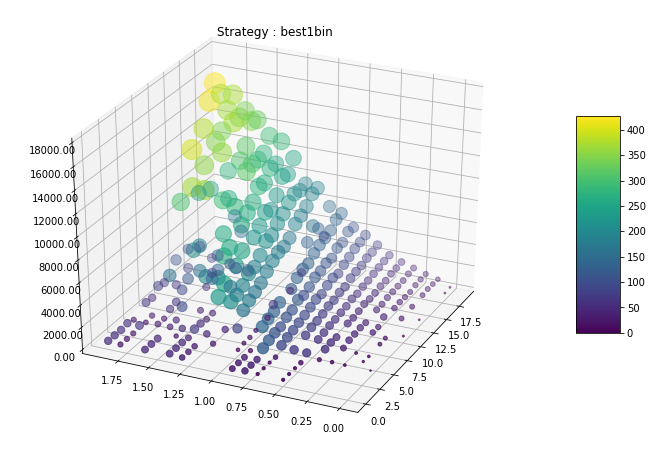

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np


fig = plt.figure(figsize=(12, 8))
ax = fig.gca(projection='3d')

ax.set_title(f'Strategy : {s}')

ax.set_xlabel('popsize')
ax.set_ylabel('mutation')
ax.set_zlabel('.nit')
# 
    

# График результатов
scat = ax.scatter3D(X, Y, N, c=Z,s = N)

# Настройка оси z
# ax.set_zlim(0, 20000)
# ax.zaxis.set_major_locator(LinearLocator(10))
# ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Цветовая легенда
fig.colorbar(scat, shrink=0.5, aspect=5, label='.nfev')


ax.azim = -155
ax.dist = 10
ax.elev = 30

    

plt.show()

best1bin


/usr/local/lib/python3.8/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


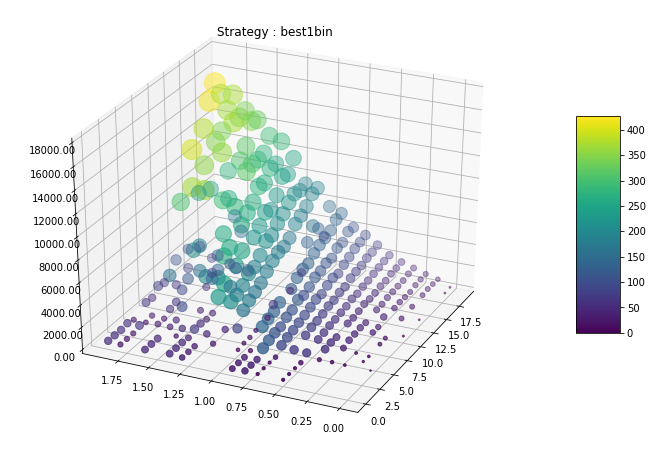

best1exp


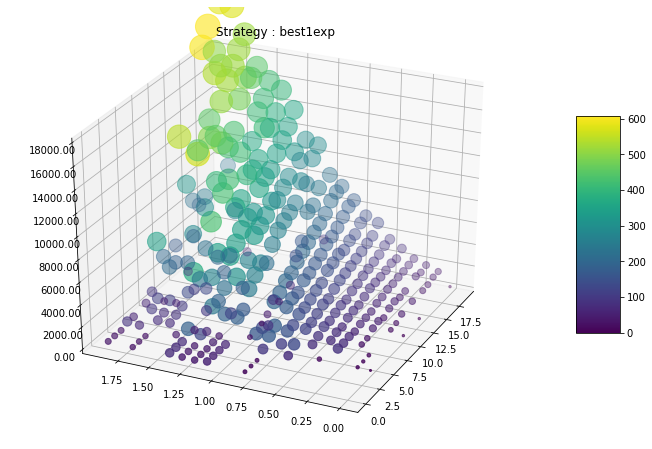

rand1exp


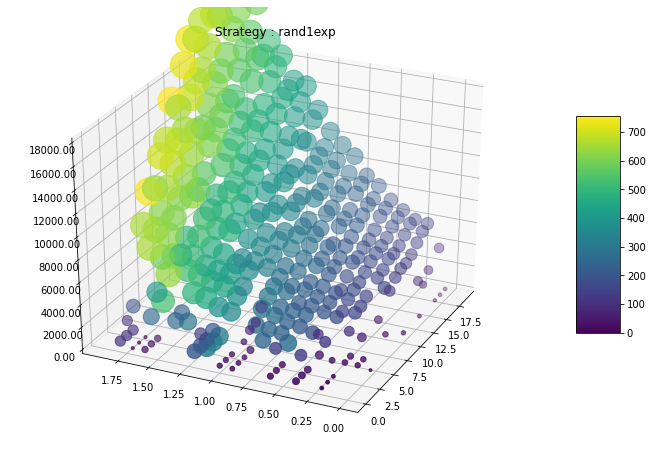

randtobest1exp


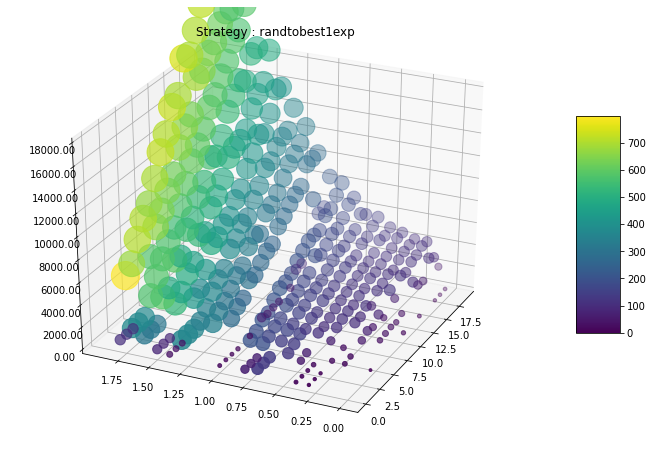

currenttobest1exp


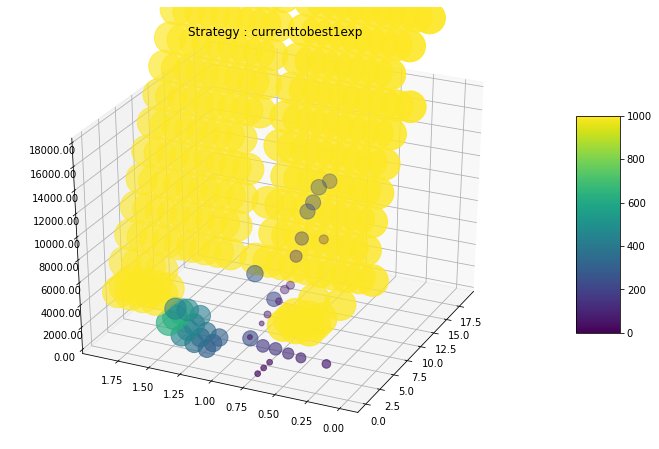

best2exp


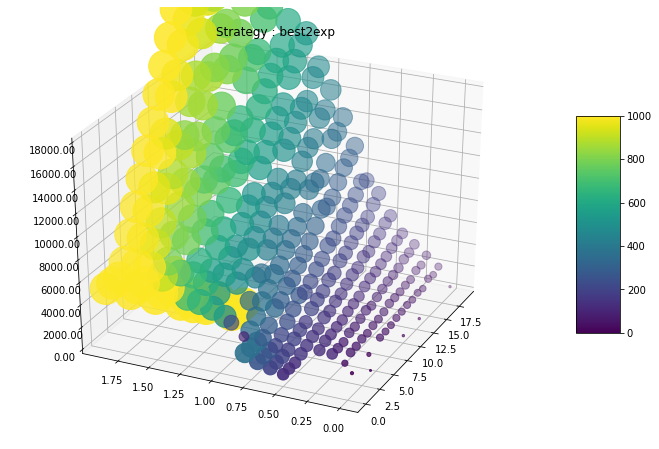

ValueError: ignored

In [ ]:
X_ = np.arange(0, 20, 1)
Y_ = np.arange(0, 2, 0.1)
# 
Z = np.empty((len(Y_),len(X_)))
N = np.empty((len(Y_),len(X_)))
# 
X, Y = np.meshgrid(X_, Y_)
# 
for s in ['best1bin',
          'best1exp',
          'rand1exp',
          'randtobest1exp',
          'currenttobest1exp',
          'best2exp',
          'randtobest1bin',
          'currenttobest1bin',
          'best2bin',
          'rand1bin'
          ]:
    for i,x in enumerate(X_):
        for j,y in enumerate(Y_):
          # print(i,j,x,y)
          dif = dif_ev_pop_mut_str(x,y,s)
          # фильтруем неудачные попытки
          if dif.fun.round(5) == 0:
              Z[j][i] = dif.nfev
              N[j][i] = dif.nit
              # print(Z[j][i], N[j][i])
          else :
              Z[j][i] = -1
              N[j][i] = -1
    # 
    print(s)
    # 
    fig = plt.figure(figsize=(12, 8))
    ax = fig.gca(projection='3d')
    # График результатов
    scat = ax.scatter3D(X, Y, N, c=Z,s = N)
    # Настройка оси z
    # ax.set_zlim(0, 20000)
    # ax.zaxis.set_major_locator(LinearLocator(10))
    # ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
    # Цветовая легенда
    fig.colorbar(scat, shrink=0.5, aspect=5, label='.nfev')
    # 
    ax.azim = -155
    ax.dist = 10
    ax.elev = 30
    #
    ax.set_xlabel('popsize')
    ax.set_ylabel('mutation')
    ax.set_zlabel('.nit')
    # 
    ax.set_title(f'Strategy : {s}')
    #  
    plt.show()

randtobest1bin


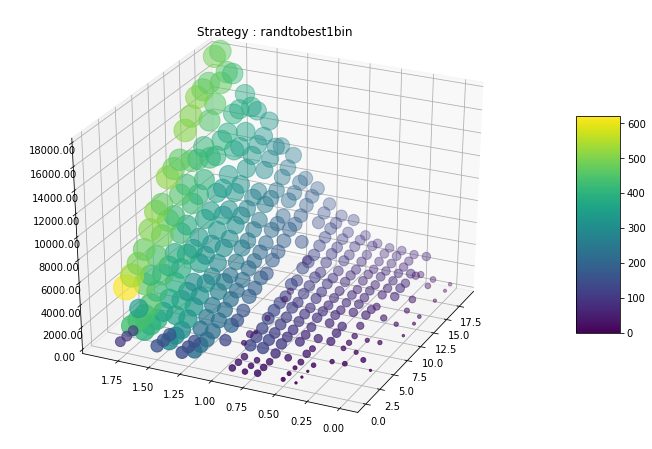

currenttobest1bin


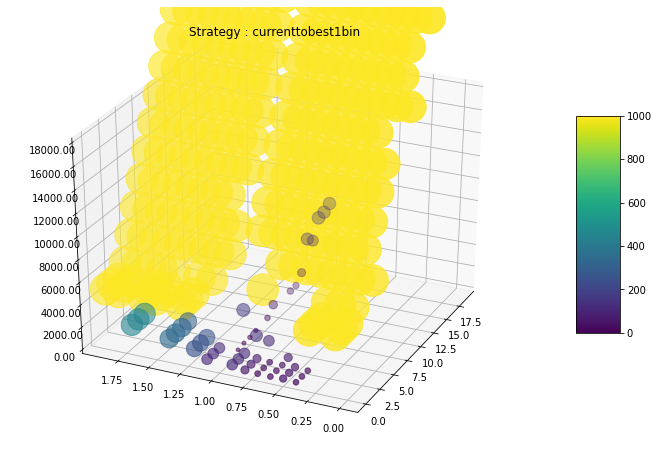

best2bin


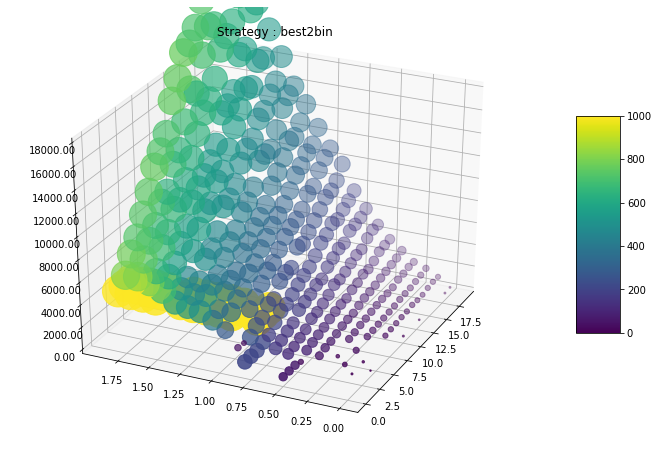

ValueError: ignored

In [ ]:
X_ = np.arange(0, 20, 1)
Y_ = np.arange(0, 2, 0.1)
# 
Z = np.empty((len(Y_),len(X_)))
N = np.empty((len(Y_),len(_X)))
# 
X, Y = np.meshgrid(X_, Y_)
# 
for s in ['randtobest1bin',
          'currenttobest1bin',
          'best2bin',
          'rand2bin',
          'rand1bin'
          ]:
    for i,x in enumerate(X_):
        for j,y in enumerate(Y_):
          # print(i,j,x,y)
          dif = dif_ev_pop_mut_str(x,y,s)
          # фильтруем неудачные попытки
          if dif.fun.round(5) == 0:
              Z[j][i] = dif.nfev
              N[j][i] = dif.nit
              # print(Z[j][i], N[j][i])
          else :
              Z[j][i] = -1
              N[j][i] = -1
    # 
    print(s)
    # 
    fig = plt.figure(figsize=(12, 8))
    ax = fig.gca(projection='3d')
    # График результатов
    scat = ax.scatter3D(X, Y, N, c=Z,s = N)
    # Настройка оси z
    # ax.set_zlim(0, 20000)
    # ax.zaxis.set_major_locator(LinearLocator(10))
    # ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
    # Цветовая легенда
    fig.colorbar(scat, shrink=0.5, aspect=5, label='.nfev')
    # 
    ax.azim = -155
    ax.dist = 10
    ax.elev = 30
    #
    ax.set_xlabel('popsize')
    ax.set_ylabel('mutation')
    ax.set_zlabel('.nit')
    # 
    ax.set_title(f'Strategy : {s}')
    #  
    plt.show()

rand1bin


/usr/local/lib/python3.8/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


NameError: ignored

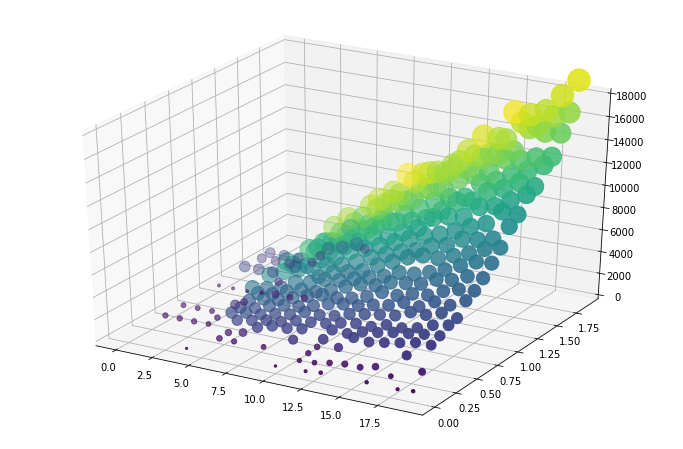

In [ ]:
X_ = np.arange(0, 20, 1)
Y_ = np.arange(0, 2, 0.1)
# 
Z = np.empty((len(Y_),len(X_)))
N = np.empty((len(Y_),len(X_)))
# 
X, Y = np.meshgrid(X_, Y_)
# 
for s in ['rand1bin']:
    for i,x in enumerate(X_):
        for j,y in enumerate(Y_):
          # print(i,j,x,y)
          dif = dif_ev_pop_mut_str(x,y,s)
          # фильтруем неудачные попытки
          if dif.fun.round(5) == 0:
              Z[j][i] = dif.nfev
              N[j][i] = dif.nit
              # print(Z[j][i], N[j][i])
          else :
              Z[j][i] = -1
              N[j][i] = -1
    # 
    print(s)
    # 
    fig = plt.figure(figsize=(12, 8))
    ax = fig.gca(projection='3d')
    # График результатов
    scat = ax.scatter3D(X, Y, N, c=Z,s = N)
    # Настройка оси z
    # ax.set_zlim(0, 20000)
    # ax.zaxis.set_major_locator(LinearLocator(10))
    # ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
    # Цветовая легенда
    fig.colorbar(scat, shrink=0.5, aspect=5, label='.nfev')
    # 
    ax.azim = -155
    ax.dist = 10
    ax.elev = 30
    #
    ax.set_xlabel('popsize')
    ax.set_ylabel('mutation')
    ax.set_zlabel('.nit')
    # 
    ax.set_title(f'Strategy : {s}')
    #  
    plt.show()

/usr/local/lib/python3.8/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


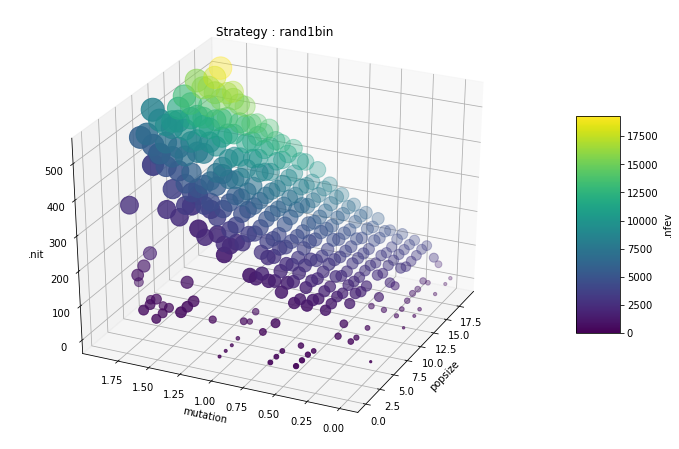

In [ ]:
fig = plt.figure(figsize=(12, 8))
ax = fig.gca(projection='3d')
# График результатов
scat = ax.scatter3D(X, Y, N, c=Z,s = N)
# Настройка оси z
# ax.set_zlim(0, 20000)
# ax.zaxis.set_major_locator(LinearLocator(10))
# ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
# Цветовая легенда
fig.colorbar(scat, shrink=0.5, aspect=5, label='.nfev')
# 
ax.azim = -155
ax.dist = 10
ax.elev = 30
# popsize=pop_, mutation=mut_
ax.set_xlabel('popsize')
ax.set_ylabel('mutation')
ax.set_zlabel('.nit')
# 
ax.set_title(f'Strategy : {s}')
#  
plt.show()

### Дополнительное задание


Поэкспериментируйте с параметрами и оптимизацией через [minimize](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html):

In [8]:
from scipy.optimize import minimize

x0 = [0,0]

result_m = minimize(ackley, x0,  method='Nelder-Mead')
result_m

 final_simplex: (array([[ 0.00000000e+00,  0.00000000e+00],
       [-1.60675049e-05, -8.45336914e-06],
       [-1.40380859e-06, -3.11279297e-05]]), array([4.44089210e-16, 5.13604405e-05, 8.81584216e-05]))
           fun: 4.440892098500626e-16
       message: 'Optimization terminated successfully.'
          nfev: 17
           nit: 8
        status: 0
       success: True
             x: array([0., 0.])

In [9]:
### YOUR CODE HERE
def mnmz_ackl(x_, y_, m_):
    return minimize(ackley, (x_,y_),  method=m_)#, jac='cs', hess='cs')

In [ ]:
for m in ['Nelder-Mead',
'Powell' ,
'CG' ,
'BFGS', 
'Newton-CG' ,
'L-BFGS-B' ,
'TNC' ,
'COBYLA' ,
'SLSQP' ,
'trust-constr',
'dogleg' ,
'trust-ncg' ,
'trust-exact' ,
'trust-krylov']:pass

Nelder-Mead


/usr/local/lib/python3.8/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


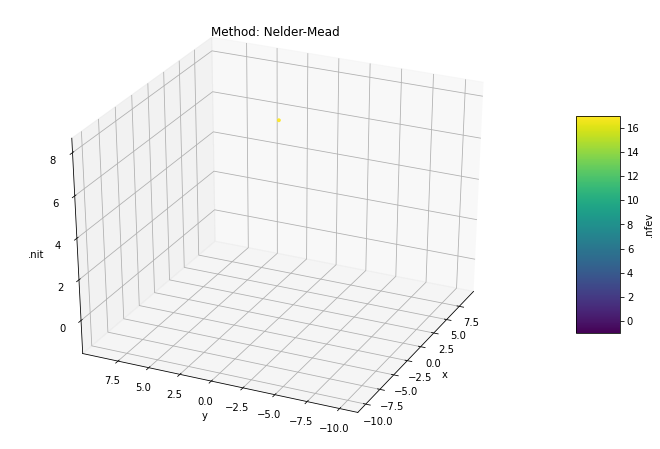

Powell


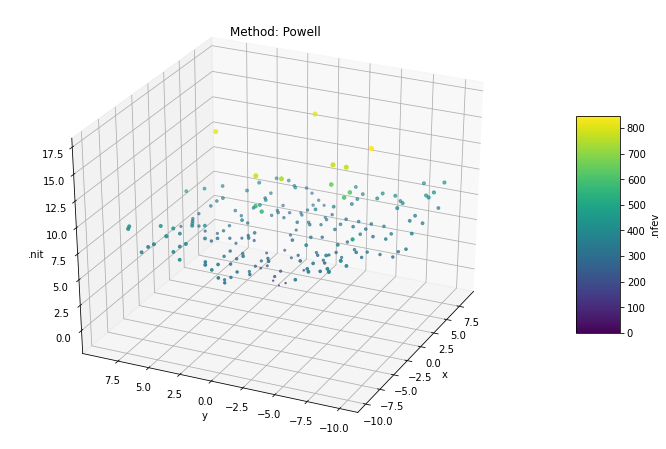

CG


/usr/local/lib/python3.8/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


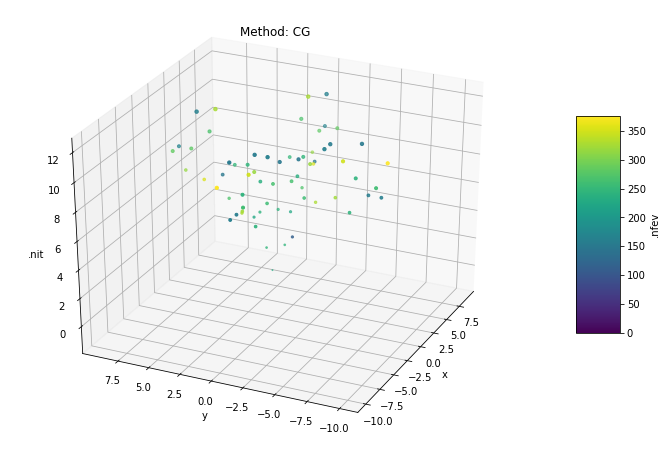

KeyboardInterrupt: ignored

In [ ]:
X_ = np.arange(-10, 10, 1)
Y_ = np.arange(-10, 10, 1)
# 
Z = np.empty((len(Y_),len(X_)))
N = np.empty((len(Y_),len(X_)))
# 
X, Y = np.meshgrid(X_, Y_)
# 
for m in ['Nelder-Mead',
    'Powell' ,
    'CG' ,
    'BFGS', 
    # 'Newton-CG' ,#+jac
    'L-BFGS-B' ,
    'TNC' ,
    'COBYLA' ,
    'SLSQP' ,
    'trust-constr',
    # 'dogleg' , #?hess
    # 'trust-ncg' , #?hess
    # 'trust-exact' , #jac
    # 'trust-krylov' #jac
    ]:
    for i,x in enumerate(X_):
        for j,y in enumerate(Y_):
          # print(i,j,x,y)
          minim = mnmz_ackl(x,y,m)
          # фильтруем неудачные попытки
          if round(minim.fun,5) == 0:
              Z[j][i] = minim.nfev
              N[j][i] = minim.nit
              # print(Z[j][i], N[j][i])
          else :
              Z[j][i] = -1
              N[j][i] = -1
    # 
    print(m)
    # 
    fig = plt.figure(figsize=(12, 8))
    ax = fig.gca(projection='3d')
    # График результатов
    scat = ax.scatter3D(X, Y, N, c=Z,s = N)
    # Настройка оси z
    # ax.set_zlim(0, 18000)
    # ax.zaxis.set_major_locator(LinearLocator(10))
    # ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
    # Цветовая легенда
    fig.colorbar(scat, shrink=0.5, aspect=5, label='.nfev')
    # 
    ax.azim = -155
    ax.dist = 10
    ax.elev = 30
    #
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('.nit')
    # 
    ax.set_title(f'Method: {m}')
    #  
    plt.show()

In [ ]:
X_ = np.arange(-10, 10, 1)
Y_ = np.arange(-10, 10, 1)
# 
Z = np.empty((len(Y_),len(X_)))
N = np.empty((len(Y_),len(X_)))
# 
X, Y = np.meshgrid(X_, Y_)
# 
for m in ['Newton-CG' ,#+jac
    'dogleg' , #?hess
    'trust-ncg' , #?hess
    'trust-exact' ,
    'trust-krylov'
    ]:
    for i,x in enumerate(X_):
        for j,y in enumerate(Y_):
          # print(i,j,x,y)
          minim = mnmz_ackl(x,y,m)
          # фильтруем неудачные попытки
          if round(minim.fun,5) == 0:
              Z[j][i] = minim.nfev
              N[j][i] = minim.nit
              # print(Z[j][i], N[j][i])
          else :
              Z[j][i] = -1
              N[j][i] = -1
    # 
    print(m)
    # 
    fig = plt.figure(figsize=(12, 8))
    ax = fig.gca(projection='3d')
    # График результатов
    scat = ax.scatter3D(X, Y, N, c=Z,s = N)
    # Настройка оси z
    # ax.set_zlim(0, 18000)
    # ax.zaxis.set_major_locator(LinearLocator(10))
    # ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
    # Цветовая легенда
    fig.colorbar(scat, shrink=0.5, aspect=5, label='.nfev')
    # 
    ax.azim = -155
    ax.dist = 10
    ax.elev = 30
    #
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('.nit')
    # 
    ax.set_title(f'Method: {m}')
    #  
    plt.show()

ValueError: ignored

In [ ]:
from scipy.optimize import minimize

x0 = [0,0]

result_m = minimize(ackley, (-10,-10),  method='Newton-CG', jac='cs', hess='cs')
result_m

ValueError: ignored

In [10]:
### YOUR CODE HERE
def mnmz_ackl(x_, y_, m_):
    return minimize(ackley, (x_,y_),  method=m_)#, jac='cs', hess='3-point')

In [11]:
X_ = np.arange(-10, 10, 1)
Y_ = np.arange(-10, 10, 1)
# 
Z = np.empty((len(Y_),len(X_)))
N = np.empty((len(Y_),len(X_)))
# 
X, Y = np.meshgrid(X_, Y_)
# 
for m in ['trust-constr']:
    for i,x in enumerate(X_):
        for j,y in enumerate(Y_):
          # print(i,j,x,y)
          minim = minimize(ackley, (x,y),  method=m)#, jac='cs', hess='3-point')
          # фильтруем неудачные попытки
          if round(minim.fun,5) == 0:
              Z[j][i] = minim.nfev
              N[j][i] = minim.nit
              # print(Z[j][i], N[j][i])
          else :
              Z[j][i] = -1
              N[j][i] = -1
    # 
    print(m)
    # 
    

/usr/local/lib/python3.8/dist-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


trust-constr


/usr/local/lib/python3.8/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


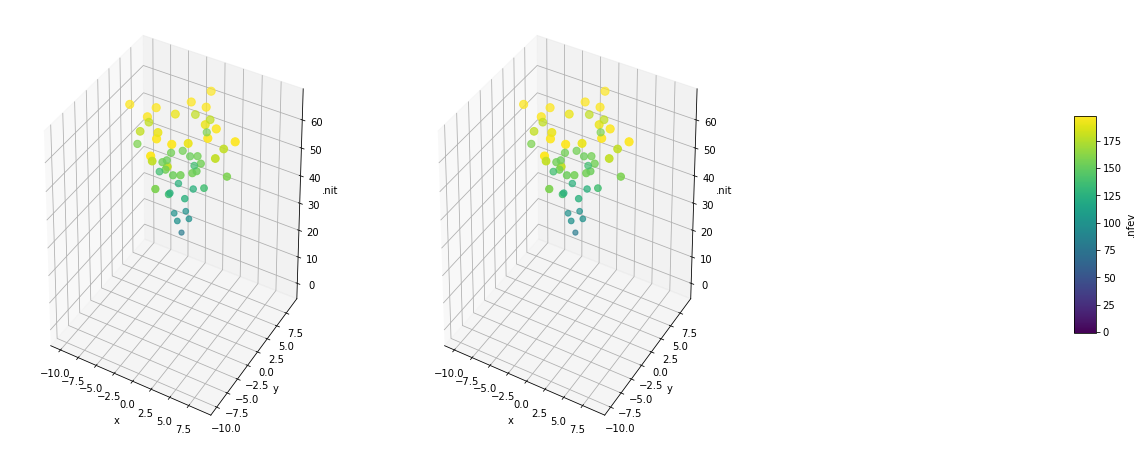

In [12]:
fig, axs = plt.subplots(1, 3, subplot_kw={'projection': '3d'})#,'aspect':'equal'})
fig.set(size_inches=(20, 8), label=f'Method: {m}')
# ax = fig.gca(projection='3d')
# График результатов
# scat = ax.scatter3D(X, Y, N, c=Z,s = N)
# Настройка оси z
# ax.set_zlim(0, 18000)
# ax.zaxis.set_major_locator(LinearLocator(10))
# ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
# Цветовая легенда
# 
    # 
# ax.set_title(f'Method: {m}')
#  
# grid = AxesGrid(fig,ax,# 122,  # similar to subplot(122)
#                 nrows_ncols=(1, 2),
#                 axes_pad=0.10,
#                 label_mode="1",
#                 share_all=True,
#                 cbar_location="right",
#                 cbar_mode="edge",
#                 cbar_size="7%",
#                 cbar_pad="2%",
#                 )

# for i in range(2):
for i,ax in enumerate(axs.flat):
    if i!=2:
        scat = ax.scatter3D(X, Y, N, c=Z,s = N)#imshow(Z, extent=extent, cmap=cmaps[i//2])
        # fig.colorbar(scat, shrink=0.5, aspect=10, label='.nfev')
        scat.azim = -155+i*60
        scat.dist = 10
        scat.elev = 30
        #
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_zlabel('.nit')   
    else: 
        fig.colorbar(scat, shrink=0.5, aspect=10, label='.nfev')
        # ax.set_box_aspect(None, zoom=0.9)
        plt.delaxes(ax)
    # if i % 2:
    #     grid.cbar_axes[i//2].colorbar(scat)


# for cax in grid.cbar_axes:
#     cax.toggle_label(True)
#     cax.axis[cax.orientation].set_label('Foo')


plt.show()

In [21]:
from matplotlib import cbook
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import AxesGrid

# fig, axs = plt.subplots(1, 1, subplot_kw={'projection': '3d'})#,'aspect':'equal'})
fig = plt.Figure(figsize=(20,8))
fig.set( label=f'Method: {m}')
# fig.set(size_inches=(20, 8), label=f'Method: {m}')
# ax = fig.gca(projection='3d')
# График результатов
# scat = ax.scatter3D(X, Y, N, c=Z,s = N)
# Настройка оси z
# ax.set_zlim(0, 18000)
# ax.zaxis.set_major_locator(LinearLocator(10))
# ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
# Цветовая легенда
# 
    # 
# ax.set_title(f'Method: {m}')
#  
grid = AxesGrid(fig,111,# 122,  # similar to subplot(122)
                nrows_ncols=(1, 2),
                axes_pad=0.10,
                label_mode="1",
                share_all=True,
                cbar_location="right",
                cbar_mode="edge",
                cbar_size="7%",
                cbar_pad="2%",
                )

# for i in range(2):
for i,ax in enumerate(grid):
    ax = Axes3D(grid[i])
    scat = ax.scatter3D(X, Y, N, c=Z,s = N)#imshow(Z, extent=extent, cmap=cmaps[i//2])
    # fig.colorbar(scat, shrink=0.5, aspect=10, label='.nfev')
    scat.azim = -155+i*60
    scat.dist = 10
    scat.elev = 30
    #
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('.nit')   
    if i % 2:
        grid.cbar_axes[i//2].colorbar(scat)

for cax in grid.cbar_axes:
        cax.toggle_label(True)
        cax.axis[cax.orientation].set_label('.nfev')
        # fig.colorbar(scat, shrink=0.5, aspect=10, label='')
        # # ax.set_box_aspect(None, zoom=0.9)
        # plt.delaxes(ax)

plt.show()

AttributeError: ignored

<ipython-input-41-6554c316c70e>:34: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.
  grid.cbar_axes[i//2].colorbar(im)
/usr/local/lib/python3.8/dist-packages/mpl_toolkits/axes_grid1/axes_grid.py:51: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid1.colorbar module was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use matplotlib.colorbar instead.
  from .colorbar import Colorbar
<ipython-input-41-6554c316c70e>:49: MatplotlibDeprecationWarning: Since 3.2, mpl_toolkits's own colorbar implementation is deprecated; it will be removed two minor releases later.  Set the 'mpl_toolkits.legacy_colorbar' rcParam to False to use Matplotlib's default colorbar implementation and suppress this deprecation warning.
  grid =

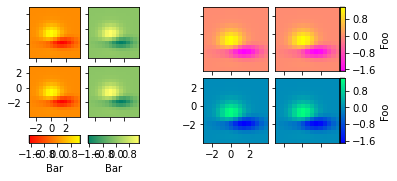

In [ ]:
from matplotlib import cbook
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import AxesGrid


def get_demo_image():
    z = np.load("bivariate_normal.npy")
    # z = cbook.get_sample_data("axes_grid/bivariate_normal.npy", np_load=True)
    # z is a numpy array of 15x15
    return z, (-3, 4, -4, 3)


def demo_bottom_cbar(fig):
    """
    A grid of 2x2 images with a colorbar for each column.
    """
    grid = AxesGrid(fig, 121,  # similar to subplot(121)
                    nrows_ncols=(2, 2),
                    axes_pad=0.10,
                    share_all=True,
                    label_mode="1",
                    cbar_location="bottom",
                    cbar_mode="edge",
                    cbar_pad=0.25,
                    cbar_size="15%",
                    direction="column"
                    )

    Z, extent = get_demo_image()
    cmaps = ["autumn", "summer"]
    for i in range(4):
        im = grid[i].imshow(Z, extent=extent, cmap=cmaps[i//2])
        if i % 2:
            grid.cbar_axes[i//2].colorbar(im)

    for cax in grid.cbar_axes:
        cax.toggle_label(True)
        cax.axis[cax.orientation].set_label("Bar")

    # This affects all axes as share_all = True.
    grid.axes_llc.set_xticks([-2, 0, 2])
    grid.axes_llc.set_yticks([-2, 0, 2])


def demo_right_cbar(fig):
    """
    A grid of 2x2 images. Each row has its own colorbar.
    """
    grid = AxesGrid(fig, 122,  # similar to subplot(122)
                    nrows_ncols=(2, 2),
                    axes_pad=0.10,
                    label_mode="1",
                    share_all=True,
                    cbar_location="right",
                    cbar_mode="edge",
                    cbar_size="7%",
                    cbar_pad="2%",
                    )
    Z, extent = get_demo_image()
    cmaps = ["spring", "winter"]
    for i in range(4):
        im = grid[i].imshow(Z, extent=extent, cmap=cmaps[i//2])
        if i % 2:
            grid.cbar_axes[i//2].colorbar(im)

    for cax in grid.cbar_axes:
        cax.toggle_label(True)
        cax.axis[cax.orientation].set_label('Foo')

    # This affects all axes because we set share_all = True.
    grid.axes_llc.set_xticks([-2, 0, 2])
    grid.axes_llc.set_yticks([-2, 0, 2])


fig = plt.figure(figsize=(5.5, 2.5))
fig.subplots_adjust(left=0.05, right=0.93)

demo_bottom_cbar(fig)
demo_right_cbar(fig)

plt.show()

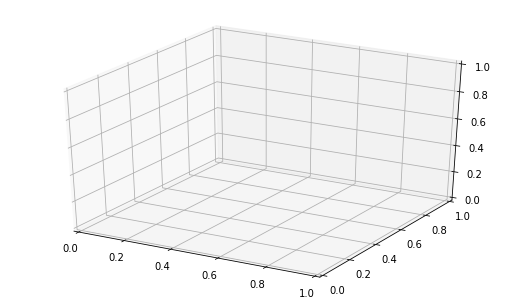

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# А, затем, создадим трехмерную систему координат:

fig = plt.figure(figsize=(7, 4))
ax_3d = Axes3D(fig)
 
plt.show()

Вы также можете поэкспериментировать с [другими методами оптимизации](https://habr.com/ru/company/prequel/blog/568496/), но это не обязательно для зачета.
